### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [345]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [347]:
data = pd.read_csv('data/coupons.csv')

2. Investigate the dataset for missing or problematic data.

In [349]:
data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [351]:
# number of NaN values

nan_values = data.isna().sum()

# Duplicates
duplicated_rows = data.duplicated().sum()

# Print
print("NaN Values:\n", nan_values.to_markdown(numalign="left", stralign="left"))
print("\nDuplicated Rows:", duplicated_rows)


NaN Values:
 |                      | 0     |
|:---------------------|:------|
| destination          | 0     |
| passanger            | 0     |
| weather              | 0     |
| temperature          | 0     |
| time                 | 0     |
| coupon               | 0     |
| expiration           | 0     |
| gender               | 0     |
| age                  | 0     |
| maritalStatus        | 0     |
| has_children         | 0     |
| education            | 0     |
| occupation           | 0     |
| income               | 0     |
| car                  | 12576 |
| Bar                  | 107   |
| CoffeeHouse          | 217   |
| CarryAway            | 151   |
| RestaurantLessThan20 | 130   |
| Restaurant20To50     | 189   |
| toCoupon_GEQ5min     | 0     |
| toCoupon_GEQ15min    | 0     |
| toCoupon_GEQ25min    | 0     |
| direction_same       | 0     |
| direction_opp        | 0     |
| Y                    | 0     |

Duplicated Rows: 74


3. Decide what to do about your missing data -- drop, replace, other...

In [353]:
# The car column pretty much is missing data for most rows. We can drop the column as it wont provide much value for analysis
data_transformed = data.drop('car', axis=1)

# Remove duplicated rows
data_transformed = data_transformed.drop_duplicates()

# Replace the values for columns Bar, CoffeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50
value_map = {'NaN': 'never'}
age_map = {'below21': 20, '50plus': 50}

columns_to_be_replaced = {'Bar': value_map, 'CoffeeHouse': value_map, 'CarryAway': value_map, 'RestaurantLessThan20': value_map, 'Restaurant20To50': value_map, 'age':  age_map }
pd.set_option('future.no_silent_downcasting', True)
data_transformed = data_transformed.replace(columns_to_be_replaced)
data_transformed['age'] = data_transformed['age'].astype(int)
data_transformed.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  int64 
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12503 non-null  object
 15  CoffeeHouse           12393 non-null  obj

4. What proportion of the total observations chose to accept the coupon?



In [355]:
# Since column contains only 1 or 0, its just the mean
proportion_of_1 = data_transformed['Y'].mean()
print("\nproportion:", proportion_of_1)


proportion: 0.5675654242664552


5. Use a bar plot to visualize the `coupon` column.

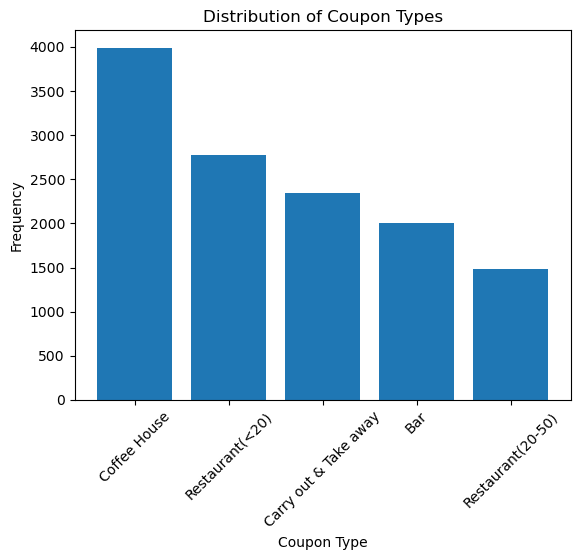

In [357]:
coupon_counts = data_transformed['coupon'].value_counts()

plt.bar(coupon_counts.index, coupon_counts.values)
plt.xlabel("Coupon Type")
plt.ylabel("Frequency")
plt.title("Distribution of Coupon Types")
plt.xticks(rotation=45) 
plt.show()

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Distribution of Temperature')

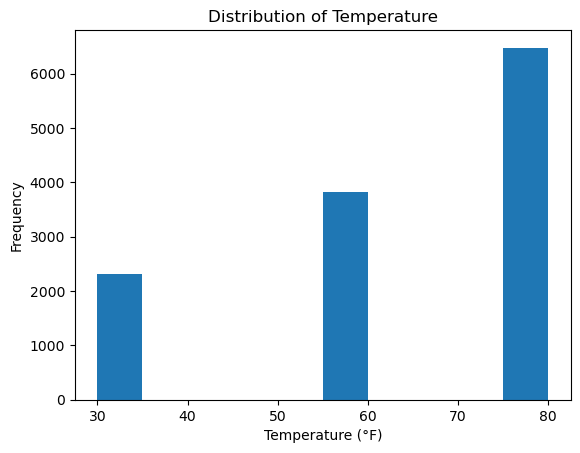

In [359]:
plt.hist(data_transformed['temperature'])

# Add labels and title
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.title("Distribution of Temperature")

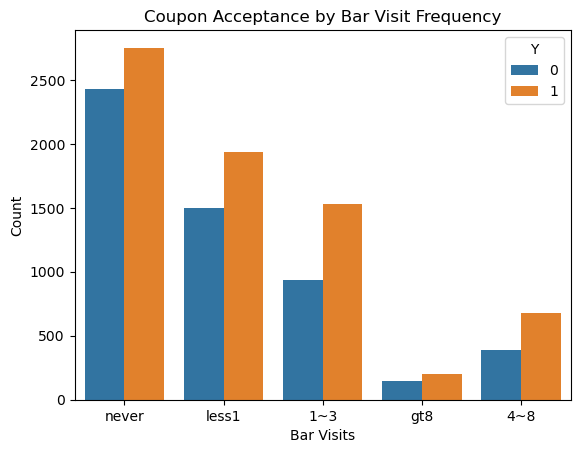

In [363]:
sns.countplot(x='Bar', hue='Y', data=data_transformed)
plt.title('Coupon Acceptance by Bar Visit Frequency')
plt.xlabel('Bar Visits')
plt.ylabel('Count')
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [365]:
bar_df = data_transformed[data_transformed['coupon'] == 'Bar'].copy()

2. What proportion of bar coupons were accepted?


In [367]:
proportion_accepted = bar_df['Y'].mean()
print(f"Proportion of bar coupons accepted: {proportion_accepted}")


Proportion of bar coupons accepted: 0.4099502487562189


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [369]:
def gorup_bar_visits(visits):
    if visits in ['never', 'less1', '1~3']:
        return 'lt 3'
    else:
        return 'gt 3'

bar_df.loc[:, 'bar_visit'] = bar_df['Bar'].apply(gorup_bar_visits)

acceptance_rates = bar_df.groupby('bar_visit')['Y'].mean()

# Print the acceptance rates
print("Acceptance rates based on bar visit frequency:")
print(acceptance_rates)

Acceptance rates based on bar visit frequency:
bar_visit
gt 3    0.731818
lt 3    0.370391
Name: Y, dtype: float64


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [371]:

bar_df.loc[:, 'age_gt_25_and_visit_gt_one'] = ((bar_df['age'] > 25) & 
                          (bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])))

# Calculate the acceptance rate for the target group
target_group_acceptance = bar_df[bar_df['age_gt_25_and_visit_gt_one'] == True]['Y'].mean()

# Calculate the acceptance rate for all others
others_acceptance = bar_df[bar_df['age_gt_25_and_visit_gt_one'] == False]['Y'].mean()

# Print the acceptance rates
print(f"Acceptance rate for target group (over 25 and go to bar more than once a month): {target_group_acceptance:.2f}")
print(f"Acceptance rate for all others: {others_acceptance:.2f}")


Acceptance rate for target group (over 25 and go to bar more than once a month): 0.70
Acceptance rate for all others: 0.33


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [373]:

bar_df.loc[:,'target_group'] = (
    (bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])) &  # Go to bars more than once a month
    (bar_df['passanger'] != 'Kid(s)') &  # Passengers were not kids
    (bar_df['occupation'] != 'Farming Fishing & Forestry')  # Occupation is not Farming, Fishing, & Forestry
)

# Calculate the acceptance rate for the target group
target_group_acceptance = bar_df[bar_df['target_group'] == True]['Y'].mean()

# Calculate the acceptance rate for all others
others_acceptance = bar_df[bar_df['target_group'] == False]['Y'].mean()

# Print the acceptance rates
print(f"Acceptance rate for target group: {target_group_acceptance}")
print(f"Acceptance rate for all others: {others_acceptance}")


Acceptance rate for target group: 0.7132486388384754
Acceptance rate for all others: 0.295407813570939


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [375]:
value_counts = bar_df['income'].value_counts()
print(value_counts)
bar_df.loc[:, 'target_group'] = (
    # Group 1: Go to bars more than once a month, had passengers that were not a kid, and were not widowed
    ((bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_df['passanger'] != 'Kid(s)') & (bar_df['maritalStatus'] != 'Widowed')) |

    # Group 2: Go to bars more than once a month and are under the age of 30
    ((bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_df['age'] < 30)) |

    # Group 3: Go to cheap restaurants more than 4 times a month and income is less than 50K
    ((bar_df['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & (bar_df['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])))
)

# Calculate the acceptance rate for the target group
target_group_acceptance = bar_df[bar_df['target_group'] == True]['Y'].mean()

# Calculate the acceptance rate for all others
others_acceptance = bar_df[bar_df['target_group'] == False]['Y'].mean()

# Print the acceptance rates
print(f"Acceptance rate for target group: {target_group_acceptance:.2f}")
print(f"Acceptance rate for all others: {others_acceptance:.2f}")

income
$25000 - $37499     318
$12500 - $24999     288
$100000 or More     288
$37500 - $49999     267
$50000 - $62499     262
Less than $12500    165
$75000 - $87499     151
$87500 - $99999     141
$62500 - $74999     130
Name: count, dtype: int64
Acceptance rate for target group: 0.59
Acceptance rate for all others: 0.30


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [318]:
1) Overall drivers who go the bar more than 3 times a month that is who are ferquent are more likely to accept the coupon.
2) Drivers who are younger under 30 and who go to the bar more frequently are likely to accept the coupon.
3) Drivers who are not driving with kids and are frequent goers to the bar for social reasons are likely to accept the coupon.
4) Drivers who frequently visit low budget restaurants because of low income are likely to accept the coupon
5) It shows that drivers not with kids and not widowed show hgiher rate of acceptance. 
This seems like marital status, or kids might also likely affect the likelihood of acceptance of the coupon.

SyntaxError: unmatched ')' (3223174146.py, line 1)

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Coffee coupon acceptance rates based on time of day:
coffee_time_category
Evening    0.468368
Morning    0.542242
Other      0.424242
Name: Y, dtype: float64


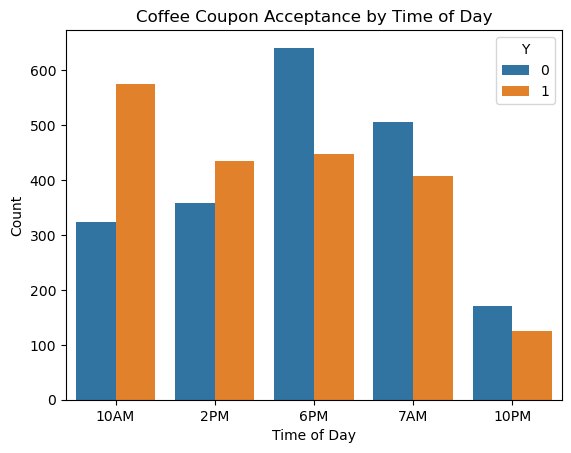

In [387]:
coffee_df = data_transformed[data_transformed['coupon'] == 'Coffee House'].copy()

# Coffee acceptances by Time
def categorize_coffee_time(time):
    if time in ['10AM', '7AM']:
        return 'Morning'
    elif time in ['2PM', '6PM']:  
        return 'Evening'
    else:
        return 'Other'


coffee_df.loc[:, 'coffee_time_category'] = coffee_df['time'].apply(categorize_coffee_time) 

# Group by 'coffee_time_category' and calculate the mean of 'Y' (acceptance rate)
acceptance_rates = coffee_df.groupby('coffee_time_category')['Y'].mean()

print("Coffee coupon acceptance rates based on time of day:")
print(acceptance_rates)

sns.countplot(x='time', hue='Y', data=coffee_df)
plt.title('Coffee Coupon Acceptance by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.savefig('data/coffee_acceptance_based_on_time.png') 
plt.show()


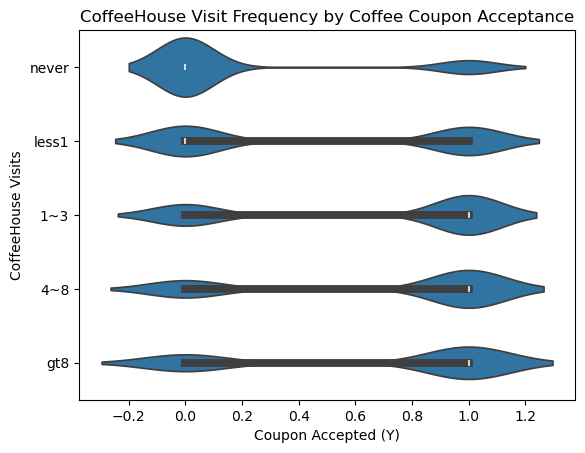

Acceptance rates based on coffee visit frequency:
coffee_visit
gt 3    0.658613
lt 3    0.448469
Name: Y, dtype: float64


In [393]:
sns.violinplot(x='Y', y='CoffeeHouse', data=coffee_df, order=['never', 'less1', '1~3', '4~8', 'gt8'])
plt.title('CoffeeHouse Visit Frequency by Coffee Coupon Acceptance')
plt.xlabel('Coupon Accepted (Y)')
plt.ylabel('CoffeeHouse Visits')
plt.savefig('data/coffee_acceptance_based_on_frequency.png') 
plt.show()


def gorup_coffee_visits(visits):
    if visits in ['never', 'less1', '1~3']:
        return 'lt 3'
    else:
        return 'gt 3'

coffee_df.loc[:, 'coffee_visit'] = coffee_df['CoffeeHouse'].apply(gorup_coffee_visits)

acceptance_rates = coffee_df.groupby('coffee_visit')['Y'].mean()

# Print the acceptance rates
print("Acceptance rates based on coffee visit frequency:")
print(acceptance_rates)

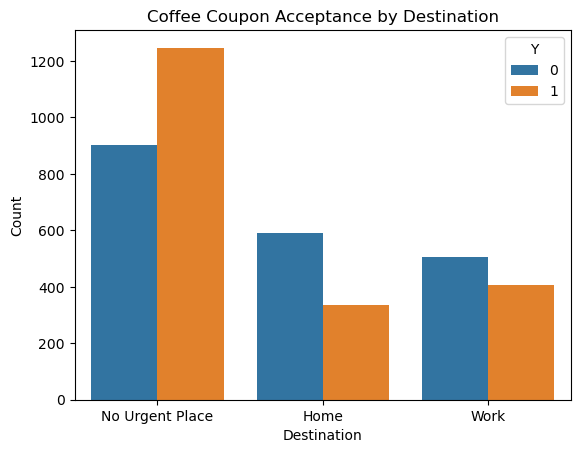

Acceptance rate for target group: 0.534978033119297
Acceptance rate for all others: 0.3941747572815534


In [391]:
sns.countplot(x='destination', hue='Y', data=coffee_df)
plt.title('Coffee Coupon Acceptance by Destination')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.savefig('data/coffee_acceptance_based_on_destination.png') 
plt.show()

coffee_df.loc[:,'target_group'] = (
    (coffee_df['destination'].isin(['No Urgent Place', 'Work'])) & 
    (coffee_df['time'].isin(['7AM', '10AM', '2PM', '6PM'])) 
)

# Calculate the acceptance rate for the target group
target_group_acceptance = coffee_df[coffee_df['target_group'] == True]['Y'].mean()

# Calculate the acceptance rate for all others
others_acceptance = coffee_df[coffee_df['target_group'] == False]['Y'].mean()

# Print the acceptance rates
print(f"Acceptance rate for target group: {target_group_acceptance}")
print(f"Acceptance rate for all others: {others_acceptance}")


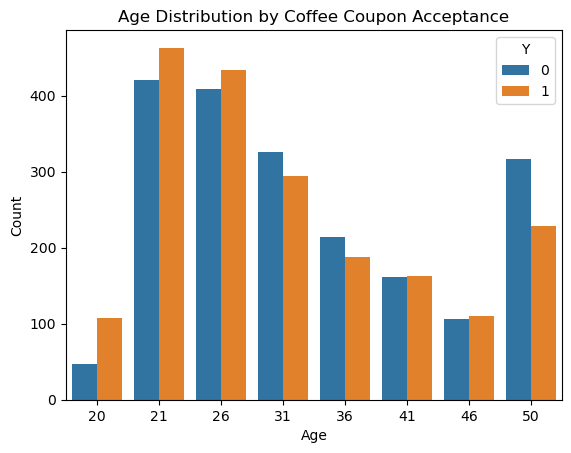

In [389]:
# Coffee acceptances by Age
sns.countplot(x='age', hue='Y', data=coffee_df)
plt.title('Age Distribution by Coffee Coupon Acceptance')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('data/coffee_acceptance_based_on_age.png') 
plt.show()


In [ ]:
Based on the visualizations and statistical analysis, the hypotheses about the characteristics of drivers who accept coffee house coupons:
1) Morning Commute: Drivers who are commuting to work and receive the coupon in the morning might be more likely to accept it.
2) Frequent Coffee Drinkers: Those who frequently visit coffee houses are more likely to be interested in coffee coupons.
3) Younger Age Groups: Younger drivers might be more receptive to coffee coupons, potentially due to higher coffee consumption or a greater tendency to try new coffee shops.
5) Casual drivers: Drivers who are not in rush to any destination are more likely to accept coffee coupons, potentially to take a break or relax.
4) Destination and Time: The combination of destination (e.g. work or no urgent place) and time of day (e.g morning and evening) could be a strong predictor of coffee coupon acceptance.
